# Web scraping 2: many pages

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from datetime import datetime
from urllib.parse import urljoin
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
URL = 'https://books.toscrape.com/'
page = ''
URL = urljoin(URL,page)
req = requests.get(URL)
soup = bs(req.text, 'lxml')
print(f"Title: {soup.title.text}")

Title: 
    All products | Books to Scrape - Sandbox



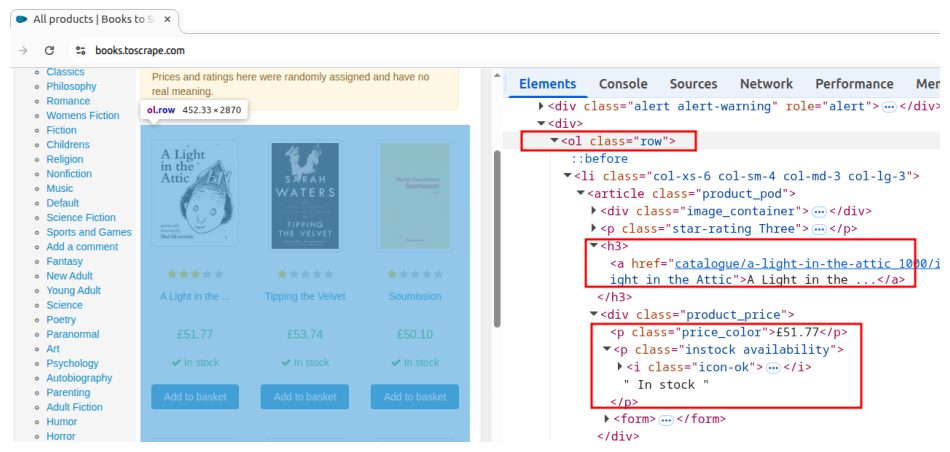

In [3]:
img = mpimg.imread("../images/books.png")

plt.figure(figsize=(12,10))     # width, height in inches
plt.imshow(img)
plt.axis("off")                 # hide axes
plt.show()

In [4]:
tag = 'ol'
class_tag = "row"
table = soup.find(tag, attrs={"class": class_tag})

In [5]:
# Get titles from table
titles = []
for row in table.find_all('h3'):
    titles.append(row.text)
    print(row.text)

A Light in the ...
Tipping the Velvet
Soumission
Sharp Objects
Sapiens: A Brief History ...
The Requiem Red
The Dirty Little Secrets ...
The Coming Woman: A ...
The Boys in the ...
The Black Maria
Starving Hearts (Triangular Trade ...
Shakespeare's Sonnets
Set Me Free
Scott Pilgrim's Precious Little ...
Rip it Up and ...
Our Band Could Be ...
Olio
Mesaerion: The Best Science ...
Libertarianism for Beginners
It's Only the Himalayas


In [6]:
# Get prices from table
prices = []
for row in table.find_all('p', class_='price_color'):
    prices.append(row.text)

In [7]:
# Get availability from table
availability = []
for row in table.find_all('p', class_='instock availability'):
    availability.append(row.text.strip())

In [8]:
print(f"Number of titles, prices and availability: {len(titles)}, {len(prices)} and {len(availability)}, respectively")

Number of titles, prices and availability: 20, 20 and 20, respectively


In [9]:
# Verify if next page exists
next_page = soup.select_one("li.next>a")

if next_page:
	page = next_page.get("href")
	URL = urljoin(URL,page)
	print(f"Next page URL: {URL}")
else:
    print("No more pages.")


Next page URL: https://books.toscrape.com/catalogue/page-2.html


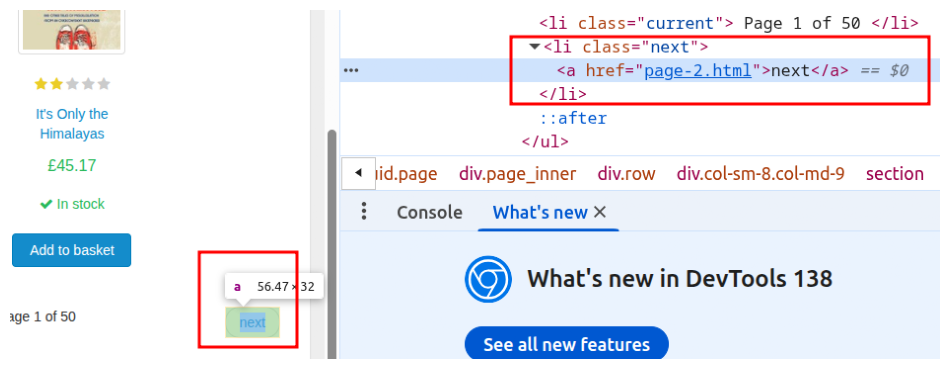

In [10]:
img = mpimg.imread("../images/pages.png")

plt.figure(figsize=(12,10))     # width, height in inches
plt.imshow(img)
plt.axis("off")                 # hide axes
plt.show()

In [11]:
movies = pd.DataFrame(data={'Title': titles, 'Price': prices, 'Availability': availability})
print(movies.head(10))

file_name = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
movies.to_csv(f"../data/movies_{file_name}.csv", index=False, sep='\t')

                          Title    Price Availability
0            A Light in the ...  Â£51.77     In stock
1            Tipping the Velvet  Â£53.74     In stock
2                    Soumission  Â£50.10     In stock
3                 Sharp Objects  Â£47.82     In stock
4  Sapiens: A Brief History ...  Â£54.23     In stock
5               The Requiem Red  Â£22.65     In stock
6  The Dirty Little Secrets ...  Â£33.34     In stock
7       The Coming Woman: A ...  Â£17.93     In stock
8           The Boys in the ...  Â£22.60     In stock
9               The Black Maria  Â£52.15     In stock
